In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("C:/Users/MSI BRAVO/Downloads/OneDrive/Data_Analyst/Python/P1_Forecasting Sales/Walmart Data Analysis and Forcasting.csv")

Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Duplicate

In [4]:
df.duplicated().sum()

np.int64(0)

Col Numeric >> Missing Value

In [5]:
numeric_cols = ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if df[col].isnull().any():
        print("มี NaN อยู่ในคอลัมน์")

numeric_cols

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Outlier

In [6]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {count} outliers")

Weekly_Sales: 34 outliers
Temperature: 3 outliers
Fuel_Price: 0 outliers
CPI: 0 outliers
Unemployment: 481 outliers


Store Recheck

In [7]:
store_date_counts = df.groupby('Store')['Date'].nunique()
if store_date_counts.var() > 0:
    print("Warning: Inconsistent number of dates across stores. Investigate.")

Last Check

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Date

In [14]:
df["Date"] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df["Date"]

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [15]:
df['Month'] = df["Date"].dt.month
df['Year'] = df["Date"].dt.year
df["Quarter"] = df["Date"].dt.quarter
df["Week"] = df["Date"].dt.isocalendar().week
df["Month_Year"] = df["Date"].dt.to_period("M")

In [16]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Quarter,Week,Month_Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,1,5,2010-02
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1,6,2010-02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,1,7,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,1,8,2010-02
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,1,9,2010-03


---

Exploratory Data Analysis: 
1. Sale >> KPI
2. Store >> Performance By Store
3. Holiday >> Affect By Holiday
4. Factor >> Affect By Factor

#1.Sales
- Year >> ปีล่าสุดขายดีขึ้นมั้ย
- Timeline >> ขายดีช่วงไหนของปี,ไม่ดีช่วงไหน

In [17]:
#Copy()
Sales_data = df.copy()
#KPI
Total_Sales = Sales_data.groupby("Year")["Weekly_Sales"].sum().reset_index(name="Total_Sales")
print(f"Baseline Sales per Year (2010-2011): {Sales_data[ (Sales_data["Year"]==2010) | (Sales_data["Year"]==2011) ]["Weekly_Sales"].sum()/2:,.0f} ")
print(f"Sales Lasted Year (2012): {Sales_data[Sales_data["Year"]==2012]["Weekly_Sales"].sum():,.0f} ")

print(f"Baseline Avg Sales per Week (2010-2011): {Sales_data[ (Sales_data["Year"]==2010) | (Sales_data["Year"]==2011) ]["Weekly_Sales"].mean():,.0f} ")
print(f"Avg Sales per Week (2012): {Sales_data[Sales_data["Year"]==2012]["Weekly_Sales"].mean():,.0f} ")


Baseline Sales per Year (2010-2011): 2,368,543,064 
Sales Lasted Year (2012): 2,000,132,859 
Baseline Avg Sales per Week (2010-2011): 1,052,686 
Avg Sales per Week (2012): 1,033,660 


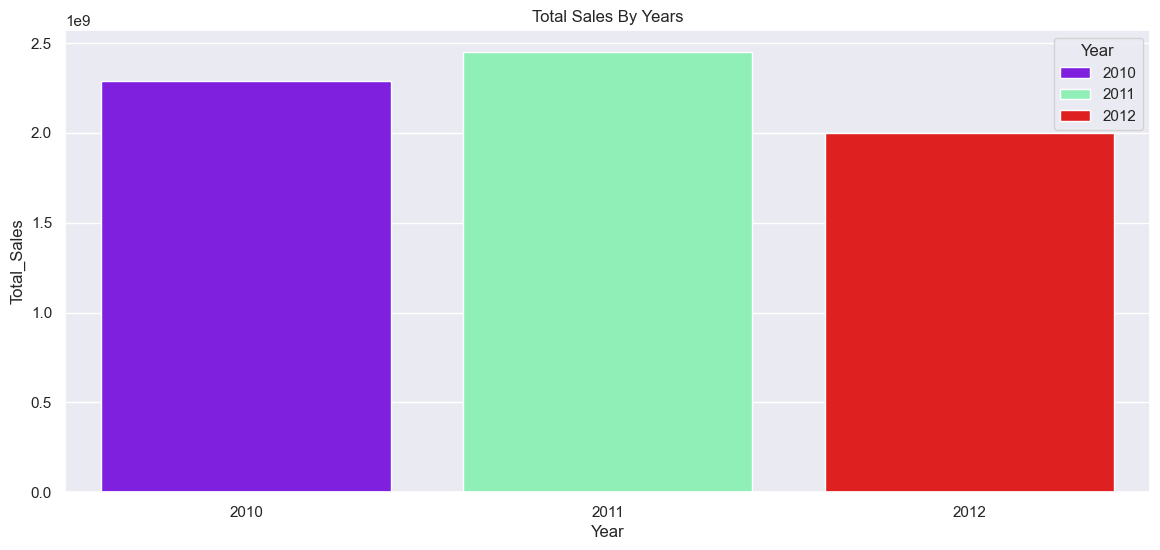

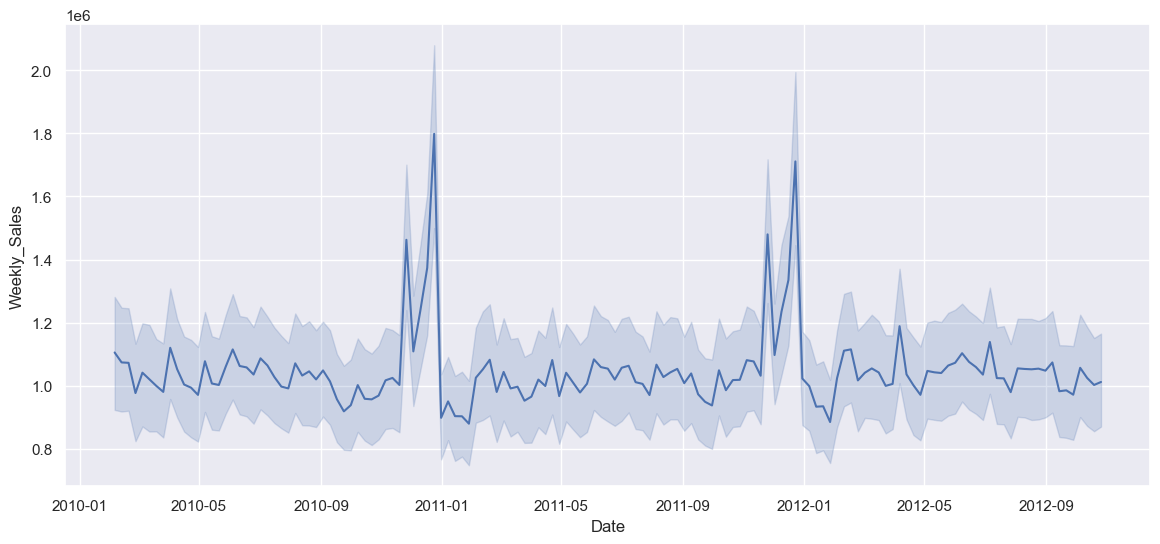

In [56]:
#Viz TotalSalesbyYear
plt.figure(figsize=(14,6))
sns.barplot(data=Total_Sales, x="Year",y="Total_Sales",hue="Year", palette="rainbow")
plt.title("Total Sales By Years")
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=Sales_data, x="Date",y="Weekly_Sales", markers="o")
plt.show()

(array([14610., 14641., 14669., 14700., 14730., 14761., 14791., 14822.,
        14853., 14883., 14914., 14944., 14975., 15006., 15034., 15065.,
        15095., 15126., 15156., 15187., 15218., 15248., 15279., 15309.,
        15340., 15371., 15400., 15431., 15461., 15492., 15522., 15553.,
        15584., 15614., 15645.]),
 [Text(14610.0, 0, 'Jan 2010'),
  Text(14641.0, 0, 'Feb 2010'),
  Text(14669.0, 0, 'Mar 2010'),
  Text(14700.0, 0, 'Apr 2010'),
  Text(14730.0, 0, 'May 2010'),
  Text(14761.0, 0, 'Jun 2010'),
  Text(14791.0, 0, 'Jul 2010'),
  Text(14822.0, 0, 'Aug 2010'),
  Text(14853.0, 0, 'Sep 2010'),
  Text(14883.0, 0, 'Oct 2010'),
  Text(14914.0, 0, 'Nov 2010'),
  Text(14944.0, 0, 'Dec 2010'),
  Text(14975.0, 0, 'Jan 2011'),
  Text(15006.0, 0, 'Feb 2011'),
  Text(15034.0, 0, 'Mar 2011'),
  Text(15065.0, 0, 'Apr 2011'),
  Text(15095.0, 0, 'May 2011'),
  Text(15126.0, 0, 'Jun 2011'),
  Text(15156.0, 0, 'Jul 2011'),
  Text(15187.0, 0, 'Aug 2011'),
  Text(15218.0, 0, 'Sep 2011'),
  Text

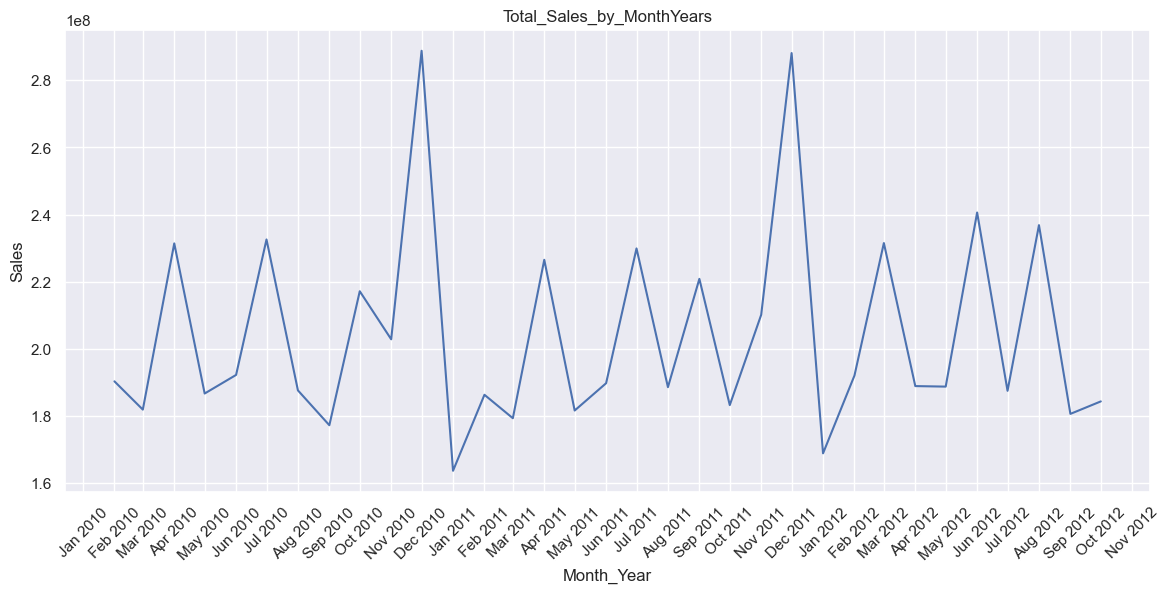

In [54]:
#Timeline for VIZ
Timeline = Sales_data.groupby("Month_Year")["Weekly_Sales"].sum().reset_index(name="Sales")
Timeline['Month_Year'] = Timeline['Month_Year'].dt.to_timestamp()

#Viz Timeline
import matplotlib.dates as mdates
plt.figure(figsize=(14,6))
sns.lineplot(data=Timeline, x="Month_Year",y="Sales" )
plt.title("Total_Sales_by_MonthYears")


ax = plt.gca()  # ดึงแกนปัจจุบัน

# ตั้ง locator และ formatter สำหรับแกน X
ax.xaxis.set_major_locator(mdates.MonthLocator())             # แสดง tick ทุกเดือน
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))   # แสดงชื่อเดือนและปี

plt.xticks(rotation=45)

---

#2.Store: Performance ดีสุด >> 
- Impact มากสุด(ขายรวมได้มากสุด) - 20%
- ขายได้ดีสม่ำเสมอ(ค่าเฉลี่ย) - 30%
- เติบโตดี - 30%
- รายได้ไม่เหวี่ยง - 20%

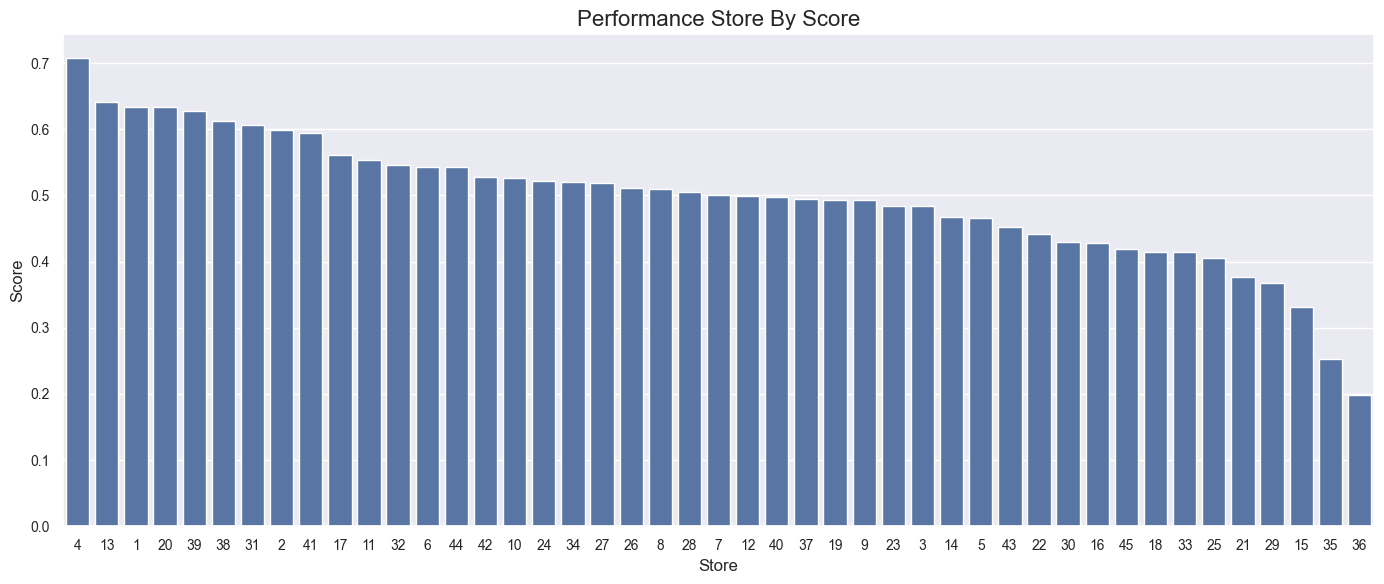

In [53]:
pd.options.display.float_format = '{:,.2f}'.format

def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

Storedata = df.copy()

#Mean Sales Per Week >> Top 5 >> Store ที่รายได้เฉลี่ยต่อ Week สูงสุด
ByYear = Storedata.groupby("Store", as_index=False).agg(Avg=("Weekly_Sales","mean")
                                                                ,Std=("Weekly_Sales","std"),
                                                                Max=("Weekly_Sales","max"),
                                                                Min=("Weekly_Sales","min"),
                                                                Total=("Weekly_Sales","sum")
                                                                ).sort_values(by="Total",ascending=False)
#%Growth
Growth = Storedata.groupby(["Store","Year"])["Weekly_Sales"].sum().reset_index(name="Sales")
Growth_Summary = Growth.groupby("Store")["Sales"].agg(["first","last"])
Growth_Summary["Growth"] = ( (Growth_Summary["last"]-Growth_Summary["first"])/Growth_Summary["first"] ).apply(lambda x: float(f"{x*100:,.2f}"))

#Merge
ByYear = pd.merge(ByYear,Growth_Summary["Growth"].reset_index(), on="Store", how="left")

#Score >> 0 ไม่ดี / 1 ดี
ByYear["Avg_norm"] = normalize(ByYear["Avg"])
ByYear['Total_norm'] = normalize(ByYear['Total'])
ByYear['Std_norm']   = 1 - normalize(ByYear['Std'])
ByYear['Growth_norm'] = normalize(ByYear["Growth"])
ByYear["Score"] = (0.4 * ByYear['Avg_norm'] +0.4 * ByYear['Growth_norm'] +0.2 * ByYear['Std_norm'])

#Display
ByYear_sorted = ByYear.sort_values(by="Score",ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(data=ByYear_sorted, x="Store", y="Score",order=ByYear_sorted["Store"])

plt.title("Performance Store By Score", fontsize=16) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

#3.Holiday
- Non-Holiday&Holiday

In [21]:
holiday_data = df.copy()

holiday_sales = holiday_data.groupby(["Holiday_Flag","Month_Year"])["Weekly_Sales"].mean().reset_index(name="Avg")
holiday_sales["Holiday_Flag"] = holiday_sales["Holiday_Flag"].apply(lambda x: "Non-Holiday" if x==0 else "Holiday")


pivot = holiday_sales.pivot_table(index="Month_Year", columns='Holiday_Flag', values='Avg')
pivot["Diff"] = pivot["Holiday"]-pivot["Non-Holiday"]
pivot["%Diff"] = (pivot["Holiday"]-pivot["Non-Holiday"])*100/pivot["Non-Holiday"]
pivot = pivot.dropna()

print(pivot)

if pivot["Diff"].sum()>0:
    print("Affect from Holiday")
    print(f"Averge Sales in Holiday more than: {pivot["%Diff"].mean():.2f}%")
else:
    print("Non affect form holiday")

Holiday_Flag      Holiday  Non-Holiday        Diff  %Diff
Month_Year                                               
2010-02      1,074,148.39 1,051,824.48   22,323.91   2.12
2010-09      1,014,097.73   975,062.95   39,034.78   4.00
2010-11      1,462,688.96 1,015,054.57  447,634.39  44.10
2010-12        898,500.42 1,379,600.08 -481,099.65 -34.87
2011-02      1,051,915.40 1,029,593.59   22,321.80   2.17
2011-09      1,039,182.83   967,136.17   72,046.66   7.45
2011-11      1,479,857.89 1,063,472.22  416,385.68  39.15
2011-12      1,023,165.80 1,344,642.45 -321,476.65 -23.91
2012-02      1,111,320.18 1,052,253.12   59,067.05   5.61
2012-09      1,074,001.32   980,114.70   93,886.61   9.58
Affect from Holiday
Averge Sales in Holiday more than: 5.54%


---

#4.Factor
- Numerical
- Categorical

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

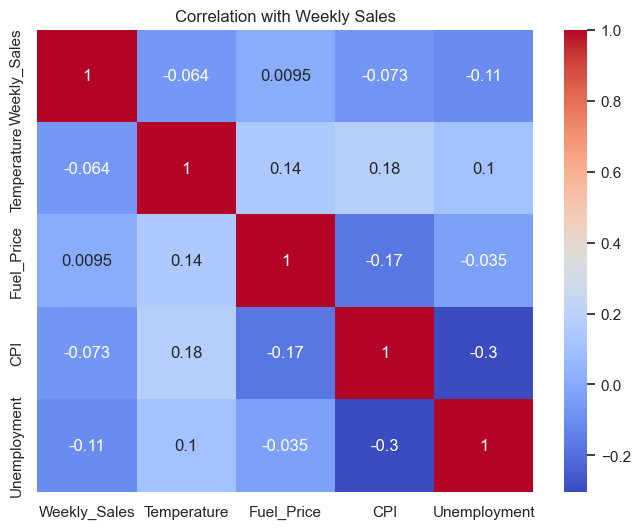

In [23]:
#Check Numerical Data
numeric_df = df[["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]

#1.Correlation >> ยังตอบได้ไม่หมดหากมองตัวแปรเดียวชนกัน
correlation = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation with Weekly Sales")
plt.show()


In [24]:
#2. Feature Selection >> Normalize Data >> ["CPI", "Unemployment","Holiday_Flag"] มีผล
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS, add_constant

f = ["Temperature","Fuel_Price","CPI", "Unemployment","Holiday_Flag"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[f])
X_scaled = add_constant(X_scaled)  # เพิ่ม intercept

model = OLS(df['Weekly_Sales'], X_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           5.93e-34
Time:                        17:27:04   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.047e+06   6947.992    150.686      0.0

In [25]:
#Linear Regression >> ยัง Forecasting ได้ไม่ดีพอต้องหา feature เพิ่ม (R2 ต่ำเกิน)
ML = df.copy() #--> Copy
data = ["CPI", "Unemployment","Holiday_Flag"]

X = ML[f]
y = ML["Weekly_Sales"]

#Test/Train Split
X_Train, X_Test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

#Train Model
model = LinearRegression()
model.fit(X_Train,y_train)

#Cal P-value
from sklearn.feature_selection import f_regression
f_regression(X,y)
p_values = f_regression(X,y)[1]

#Summary
reg_summary = pd.DataFrame(data = X.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = model.coef_
reg_summary ['p-values'] = p_values.round(3)

for index, row in reg_summary.iterrows():
    feature_row = row["Features"]
    pvalue_row = row["p-values"]
    coef = row["Coefficients"]

    if pvalue_row < 0.05:
        print(f"Feature: {feature_row} มีนัยยะสำคัญเนื่องจาก {pvalue_row:,.2f} < 0.05 (coefficient:{coef:,.2f})")

Feature: Temperature มีนัยยะสำคัญเนื่องจาก 0.00 < 0.05 (coefficient:-613.39)
Feature: CPI มีนัยยะสำคัญเนื่องจาก 0.00 < 0.05 (coefficient:-1,542.33)
Feature: Unemployment มีนัยยะสำคัญเนื่องจาก 0.00 < 0.05 (coefficient:-40,555.36)
Feature: Holiday_Flag มีนัยยะสำคัญเนื่องจาก 0.00 < 0.05 (coefficient:48,304.09)


R2 Score: 0.10780552756969142


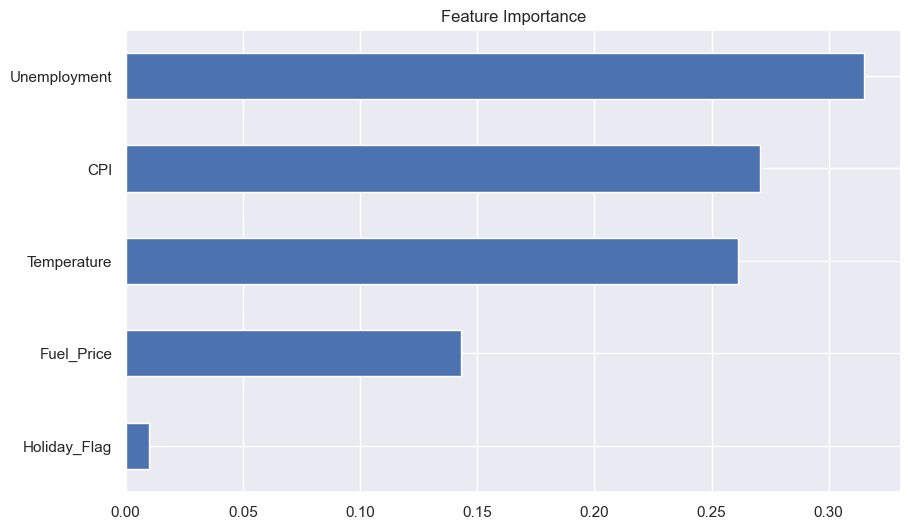

In [ ]:
#Weight of Affectiveness: Raindom Forest
features = [ 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = df[features]
y = df['Weekly_Sales']

# แบ่ง Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ทำนายและวัดผล
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

# ดู Feature Importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.show()

---

Forecasting

04:02:47 - cmdstanpy - INFO - Chain [1] start processing
04:02:47 - cmdstanpy - INFO - Chain [1] done processing


            ds         yhat  yhat_lower   yhat_upper
0   2010-02-05 1,069,117.10  339,595.03 1,816,382.15
1   2010-02-12 1,083,759.63  387,050.12 1,840,714.54
2   2010-02-19 1,052,648.82  333,026.91 1,756,362.15
3   2010-02-26 1,025,660.13  279,216.47 1,759,842.40
4   2010-03-05 1,019,534.72  283,593.96 1,679,512.04
..         ...          ...         ...          ...
168 2012-11-21 1,183,447.32  485,299.91 1,886,173.70
169 2012-11-22 1,188,070.05  479,114.20 1,866,917.24
170 2012-11-23 1,192,835.46  466,767.68 1,938,323.87
171 2012-11-24 1,197,889.87  502,833.10 1,956,183.38
172 2012-11-25 1,203,378.36  494,842.26 1,903,101.27

[173 rows x 4 columns]


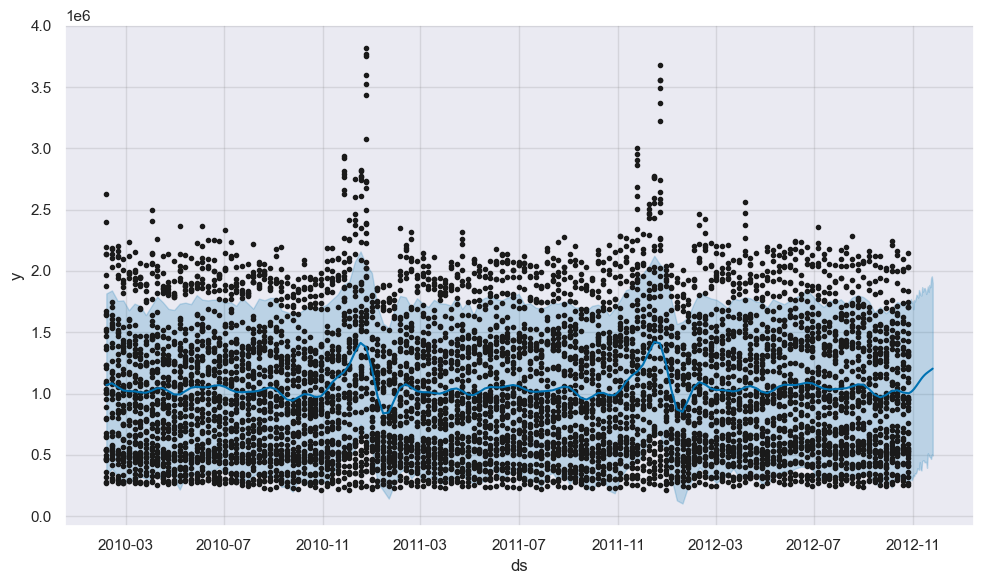

In [ ]:
#forecasting Time-Analysis: Prophet >> Ineffective
from prophet import Prophet
import pandas as pd

# เตรียมข้อมูล: ต้องใช้ 2 คอลัมน์ ชื่อ 'ds' กับ 'y'
df_prophet = df[["Date", "Weekly_Sales"]].rename(columns={"Date": "ds", "Weekly_Sales": "y"})

# สร้างและเทรนโมเดล
model = Prophet()
model.fit(df_prophet)

# สร้างช่วงเวลาที่จะพยากรณ์ล่วงหน้า (เช่น 30 วัน)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# ดูผลลัพธ์
model.plot(forecast)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


---

#Edit

In [25]:
#Categorical Data
Categorical_Data = df.copy()

from sklearn.linear_model import LinearRegression

X = df[["Holiday_Flag"]]  # หรือรวมกับ features อื่นด้วย
y = df["Weekly_Sales"]

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]}")
if model.coef_>0:
    print(f"วันหยุดมีผลทำให้ยอดขายเพิ่มขึ้น")
else:
    print("วันหยุดไม่มีผลต่อยอดขาย")

print(f"Intercept: {model.intercept_}")

from scipy.stats import f_oneway

sales_holiday = df[df["Holiday_Flag"] == 1]["Weekly_Sales"]
sales_normal = df[df["Holiday_Flag"] == 0]["Weekly_Sales"]

f_stat, p_val = f_oneway(sales_holiday, sales_normal)
print(f"p-value: {p_val}")

Coefficient: 81631.51214669843
วันหยุดมีผลทำให้ยอดขายเพิ่มขึ้น
Intercept: 1041256.3802088556
p-value: 0.0030786992638024567
